In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

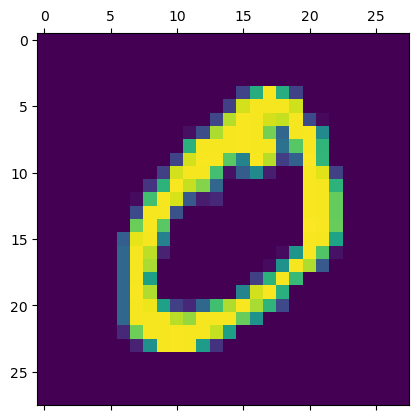

In [7]:
plt.matshow(X_train[1])

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend = X_test.reshape(len(X_test),28*28)

In [11]:
X_train_flattend.shape,X_test_flattend.shape

((60000, 784), (10000, 784))

#### Single layer network

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattend,y_train,epochs=5)

C:\Users\dhair\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8110 - loss: 0.7221
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9145 - loss: 0.3040
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9195 - loss: 0.2880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9228 - loss: 0.2724
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9267 - loss: 0.2632


In [13]:
model.evaluate(X_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9111 - loss: 0.3114


[0.27183279395103455, 0.9239000082015991]

In [14]:
y_pred = model.predict(X_test_flattend)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


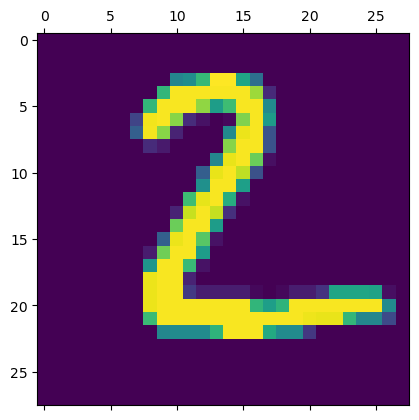

In [15]:
plt.matshow(X_test[1])

In [16]:
y_pred[0]

array([3.8810376e-02, 4.9094530e-07, 7.0159473e-02, 9.6362525e-01,
       2.6266978e-03, 1.0075563e-01, 1.8987650e-06, 9.9975365e-01,
       1.5513901e-01, 7.5926721e-01], dtype=float32)

In [17]:
np.argmax(y_pred[1])

2

In [18]:
y_pred_label = [np.argmax(x) for x in y_pred]

In [19]:
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred_label)

In [22]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1109,    4,    2,    0,    1,    3,    2,   14,    0],
       [   9,    9,  928,   17,    6,    2,   10,    9,   37,    5],
       [   5,    0,   19,  925,    0,   19,    1,    9,   20,   12],
       [   2,    1,    9,    2,  890,    0,    8,    4,   12,   54],
       [  12,    3,    8,   38,   10,  765,    8,    7,   33,    8],
       [  17,    3,    9,    1,    7,   16,  899,    2,    4,    0],
       [   1,    5,   25,    6,    5,    1,    0,  935,    3,   47],
       [   9,    7,    7,   23,    9,   21,    6,    8,  875,    9],
       [  11,    7,    1,   12,   12,    4,    0,   10,    7,  945]])>

Text(50.722222222222214, 0.5, 'Truth')

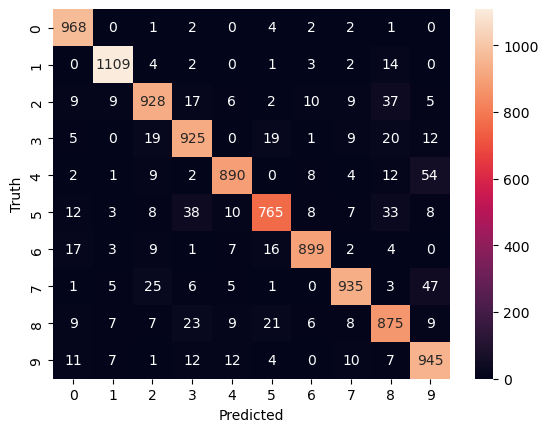

In [23]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Multi layer network

In [24]:
model1 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(X_train_flattend,y_train,epochs=5)

C:\Users\dhair\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8645 - loss: 0.4671
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9620 - loss: 0.1319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9750 - loss: 0.0854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9803 - loss: 0.0649
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9851 - loss: 0.0468


In [25]:
model1.evaluate(X_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.1038


[0.08785965293645859, 0.974399983882904]

In [26]:
y_pred1 = model1.predict(X_test_flattend)
y_pred_label1 = [np.argmax(x) for x in y_pred1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [27]:
cm1 = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred_label1)

Text(50.722222222222214, 0.5, 'Truth')

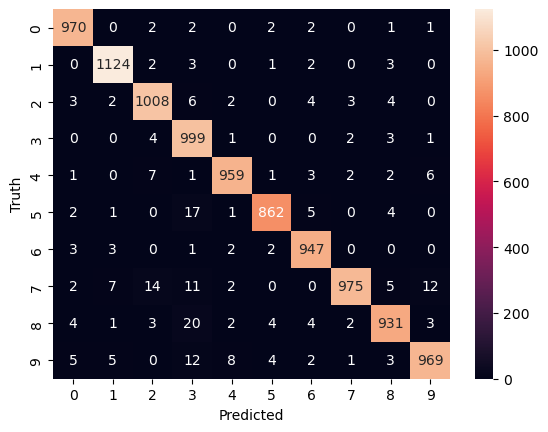

In [28]:
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### input layer using Flatten in keras and using sigmoid activation fuction at output layer

In [29]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(X_train,y_train,epochs=10)

C:\Users\dhair\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8660 - loss: 0.4713
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9607 - loss: 0.1345
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9743 - loss: 0.0903
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0672
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9837 - loss: 0.0515
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0391
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9902 - loss: 0.0340
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9925 - loss: 0.0256
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9940 - loss: 0.0202
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9950 - loss: 0.0180


In [30]:
model1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.1040


[0.08755768090486526, 0.9751999974250793]

#### using softmax activation fuction at output layer

In [31]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8743 - loss: 0.4526
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9602 - loss: 0.1342
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9732 - loss: 0.0889
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9802 - loss: 0.0652
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0484
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0396
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9903 - loss: 0.0314
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9927 - loss: 0.0246
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9930 - loss: 0.0233
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9945 - loss: 0.0185


In [32]:
model1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0973


[0.08707845211029053, 0.9768999814987183]

In [34]:
y_pred1 = model1.predict(X_test)
y_pred_label1 = [np.argmax(x) for x in y_pred1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [37]:
cm1 = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred_label1)

Text(50.722222222222214, 0.5, 'Truth')

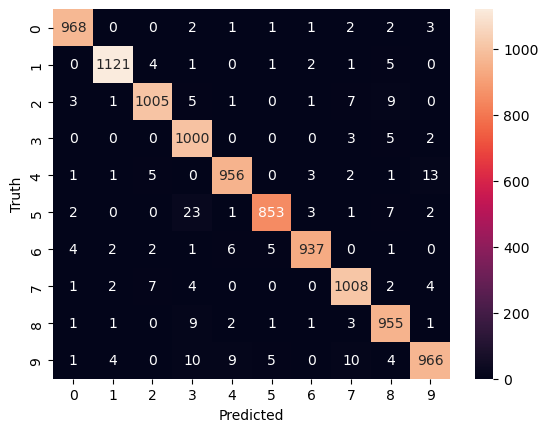

In [38]:
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')